# Setembro Amarelo: análise de Dados de Suicidios no Mundo e no Brasil

Todos os anos, temos relatos de pessoas que tiram as suas vidas aqui, acolá e por aí vai. Em um cenário mundial, fala-se de milhões de pessoas que tiram as suas vidas, levando o suicídio a ser considerado um problema de saúde pública.


<center><img src="https://raw.githubusercontent.com/carlosfab/data_science/master/img/setembro_amarelo.png"></center>

**Setembro Amarelo** é uma iniciativa da Associação Brasileira de Psiquiatria (ABP), em parceria com o Conselho Federal de Medicina (CFM), para divulgar e alertar a população sobre o problema.

Oficialmente, o Dia Mundial de Prevenção ao Suicídio ocorre no dia 10 de Setembro, e para este ano o lema foi **"Se precisar, peça ajuda!"**.

Muito além de simples análises de dados sobre o suicidio, a ideia é trazer uma pequena contribuição que visa ajudar a entender a extensão desse problema no Brasil, em África, no Mundo em geral.

## Descrição do Dataset

O dataset usado para estas análises foi extraido [neste site](https://www.kaggle.com/datasets/ronaldonyango/global-suicide-rates-1990-to-2022?select=suicide_rates_1990-2022.csv), e traz informações sobre vários países, infelizmente não encontrei dados de Angola. O *dataset* contempla o período entre os anos de 1990 a 2020.

# Análise dos Dados

In [107]:
# importar bibliotecas necessáras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as pyo
import statsmodels.api as sm
import ipywidgets as widgets
from ipywidgets import interactive

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [108]:
# importar os dados sobre suicídio para um DataFrame
df = pd.read_csv("suicide_rates_1990-2022.csv")
# ver o formato do DataFrame
print("Formato do DataFrame: ", df.shape)

# Contar o número de países únicos
num_paises = df['CountryName'].nunique()
print(f"Número total de países: {num_paises}")
df.columns

Formato do DataFrame:  (118560, 18)
Número total de países: 117


Index(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Year', 'Sex',
       'AgeGroup', 'Generation', 'SuicideCount',
       'CauseSpecificDeathPercentage', 'DeathRatePer100K', 'Population', 'GDP',
       'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
       'EmploymentPopulationRatio'],
      dtype='object')

### Dicionário de Variáveis

Esse arquivo *csv* possui 18 colunas. São elas: 
* **RegionCode:** Código da região.
* **RegionName:** Nome da região.
* **CountryCode:** Código do país.
* **CountryName:** Nome do país.
* **Year:** Ano.
  * 1990 a 2022
* **Sex:** Gênero (Masculino/Feminino).
* **AgeGroup:** Faixa etária.
  * 5-14 anos
  * 15-24 anos
  * 25-34 anos
  * 35-54 anos
  * 55-74 anos
  * 75+ anos
* **Generation:** Geração (Ex: Generation Alpha, Generation Z).
* **SuicideCount:** Número de suicídios.
* **CauseSpecificDeathPercentage:** Percentual de mortes específicas por suicídio.
* **DeathRatePer100K:** Taxa de morte por 100 mil habitantes.
* **Population:** População.
* **GDP:** Produto Interno Bruto (PIB).
* **GDPPerCapita:** PIB per capita.
* **GrossNationalIncome:** Renda Nacional Bruta.
* **GNIPerCapita:** Renda Nacional Bruta per capita.
* **InflationRate:** Taxa de inflação.
* **EmploymentPopulationRatio:** Proporção de emprego na população.

## Análise Exploratória dos Dados

O conjunto de dados contém 118.560 linhas e 18 colunas. Como você pode ver abaixo, os dados podem ser agrupados por vários critérios como país, ano, sexo e idade.

Além de trabalhar nos dados mundiais, vou também isolar do conjunto de dados um *DataFrame* contendo apenas as informações relacionadas ao Brasil para poder perceber a situação do País comparada com o mundo

Para ter uma noção da integridade dos dados, verifiquei isoladamente os *DataFrames* do Brasil e o Mundial. Principalmente quando se quer comparar duas coisas, é importante que eles sejam similares e estatisticamente representativas.

Foi necessário fazer ajustes nos dados faltantes de algumas variáveis substituindo-os pela media da respectiva variável

### consulta de valres ausentes

In [109]:
# valores ausentes nos dados mundiais
print("--> Mundial:")
display(df.isnull().sum())

--> Mundial:


RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4289
DeathRatePer100K                10664
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64

### Tratamento de dados vazios

In [110]:
# 1. Remover colunas com muitos dados ausentes (definindo um limite de 30% de valores ausentes)
ajustes = len(df) * 0.3
dados_ajustados = df.dropna(thresh=ajustes, axis=1)

# Preencher valores ausentes nas colunas de interesse com a média
dados_ajustados['GDPPerCapita'] = dados_ajustados['GDPPerCapita'].fillna(dados_ajustados['GDPPerCapita'].mean())
dados_ajustados['DeathRatePer100K'] = dados_ajustados['DeathRatePer100K'].fillna(dados_ajustados['DeathRatePer100K'].mean())
dados_ajustados['SuicideCount'] = dados_ajustados['SuicideCount'].fillna(dados_ajustados['SuicideCount'].mean())
dados_ajustados['Population'] = dados_ajustados['Population'].fillna(dados_ajustados['Population'].mean())


# Verificar se os dados foram preenchidos corretamente
dados_ajustados.isnull().sum()



RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                        0
CauseSpecificDeathPercentage     4289
DeathRatePer100K                    0
Population                          0
GDP                              7240
GDPPerCapita                        0
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64

### Dataframe do Brasil

In [111]:
# Dataframe Brasil
df_brasil = dados_ajustados[dados_ajustados.CountryName == "Brazil"].copy()

# ver o formato do novo DataFrame
print("Formato do DataFrame: ", df_brasil.shape)

df_brasil.head()

Formato do DataFrame:  (1620, 18)


,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
11740,CSA,Central and South America,BRA,Brazil,1990,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,2.456184e+07,NaN,17423.508254,NaN,NaN,NaN,NaN
11741,CSA,Central and South America,BRA,Brazil,1990,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,2.456184e+07,NaN,17423.508254,NaN,NaN,NaN,NaN
11742,CSA,Central and South America,BRA,Brazil,1990,Male,0-14 years,Generation Alpha,1.0,0.023753,0.010931,2.456184e+07,NaN,17423.508254,NaN,NaN,NaN,NaN
11743,CSA,Central and South America,BRA,Brazil,1990,Male,0-14 years,Generation Alpha,33.0,0.721469,0.395270,2.456184e+07,NaN,17423.508254,NaN,NaN,NaN,NaN
11744,CSA,Central and South America,BRA,Brazil,1990,Male,15-24 years,Generation Z,249.0,2.038310,3.337410,2.456184e+07,NaN,17423.508254,NaN,NaN,NaN,NaN


In [112]:
# valores ausentes nos dados mundiais
print("--> Mundial:")
display(dados_ajustados.isnull().sum())

print("\n", "--." * 10, "\n")

# velores ausentes nos dados do Brasil
print("--> Brasil:")
display(df_brasil.isnull().sum())

--> Mundial:


RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                        0
CauseSpecificDeathPercentage     4289
DeathRatePer100K                    0
Population                          0
GDP                              7240
GDPPerCapita                        0
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64


 --.--.--.--.--.--.--.--.--.--. 

--> Brasil:


RegionCode                       0
RegionName                       0
CountryCode                      0
CountryName                      0
Year                             0
Sex                              0
AgeGroup                         0
Generation                       0
SuicideCount                     0
CauseSpecificDeathPercentage    32
DeathRatePer100K                 0
Population                       0
GDP                             40
GDPPerCapita                     0
GrossNationalIncome             40
GNIPerCapita                    40
InflationRate                   40
EmploymentPopulationRatio       40
dtype: int64

## Total de Subsidios

In [113]:
import locale

# Definir a localidade para usar ponto como separador de milhar e vírgula como decimal
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Calcular o número total de suicídios
total_suicides = dados_ajustados['SuicideCount'].sum()
total_suicides_br = df_brasil['SuicideCount'].sum()

# Formatar o número total no formato desejado
format_total_suicides = locale.format_string("%0.2f", total_suicides, grouping=True)
format_total_suicides_br = locale.format_string("%0.2f", total_suicides_br, grouping=True)

# Exibir o número total de suicídios formatado
print(f'O número total de suicídios no mundo no  período de de 1990 a 2022 é: {format_total_suicides} \n e no Brasil: {format_total_suicides_br}')


O número total de suicídios no mundo no  período de de 1990 a 2022 é: 7.544.214,27 
 e no Brasil: 269.397,00


# Análise por Regiões

### Análise de suicidios por ano - Continentes vs Brasil

Alem da análise do número de suicios ao longo dos anos, fiz uma comparação que diz respeito ao número de suicídios cometidos no Brasil por 100 mil habitantes, e a tendência do gráfico em relação à taxa mundial.

In [114]:

# Group data by continent and year
grouped_data = df.groupby(['RegionName', 'Year'])['SuicideCount'].sum().reset_index()

# Filtrar os dados do Brasil e somar suicídios por ano
brazil_data = df[df['CountryName'] == 'Brazil'].groupby(['Year'])['SuicideCount'].sum().reset_index()

# Adicionar uma coluna para identificar o Brasil como uma "região"
brazil_data['RegionName'] = 'Brazil'

# Combinar os dados do Brasil com os dados dos continentes
combined_data = pd.concat([grouped_data, brazil_data])

# Criar o gráfico com os dados combinados
fig = px.line(combined_data, x='Year', y='SuicideCount', color='RegionName',
              title='Sucidios por Ano - Continentes vs Brasil')

# Atualizar o layout
fig.update_layout(xaxis_title='', yaxis_title='')

# Adicionar uma caixa de informações ao passar o mouse
fig.update_layout(
    hovermode='x unified',
    hoverlabel=dict(
        bgcolor='white',
        font_size=14,
        font_family='Arial'
    )
)

# Atualizar a legenda
fig.update_layout(legend_title='')

# Exibir o gráfico
fig.show()


### Comparação da taxa pr 100k habitantes Brasil - Mundo

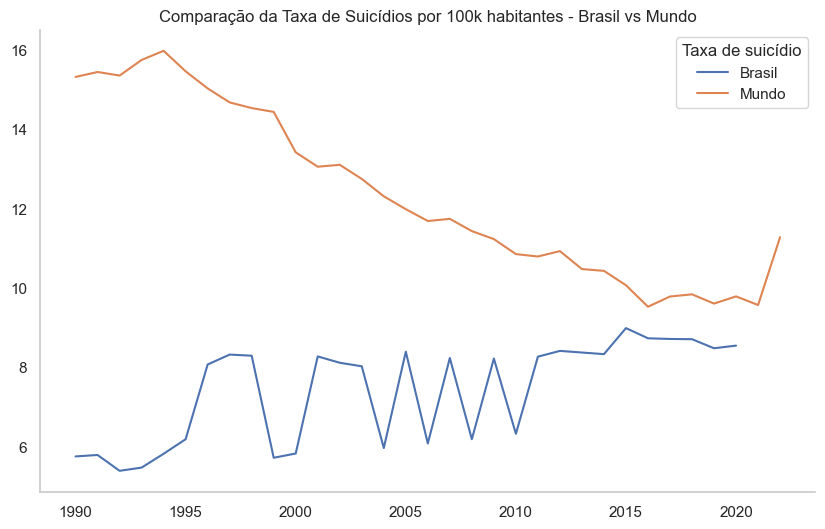

In [115]:
# Verificar se há valores ausentes nas colunas relevantes para o cálculo
df_brasil.isnull().sum()

# Agora, calcular a média anual de suicídios por 100 mil habitantes no Brasil e no mundo
years = df_brasil['Year'].unique()  # Anos para o eixo X

# Calcular a média anual de suicídios por 100k habitantes no Brasil
suicides_brasil_mean = df_brasil.groupby('Year')['DeathRatePer100K'].mean()

# Calcular a média anual de suicídios por 100k habitantes no mundo
suicides_world_mean = dados_ajustados.groupby('Year')['DeathRatePer100K'].mean()

# Verificar se há o ano de 2016 e removê-lo (caso necessário)
if 2022 in suicides_brasil_mean.index:
    suicides_world_mean.drop(2022, inplace=True)

# Plotar o gráfico comparativo entre Brasil e o Mundo
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=suicides_world_mean.index, y=suicides_world_mean, label='Mundo')

# Remover as bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Ajustes no gráfico
plt.legend(title="Taxa de suicídio")
plt.title('Comparação da Taxa de Suicídios por 100k habitantes - Brasil vs Mundo')
plt.xlabel('')
plt.ylabel('')

# Remover grid
plt.grid(False)

# Exibir o gráfico
plt.show()


Nos dois gráficos acima percebe-se que apesar da taxa de suicídios no Brasil ser menor que a média mundial, ela vem crescendo constantemente ao longo de 30 anos.

A linha laranja teve um pico por volta de 1994 e 1995, porém reverteu o *slope* e vem caindo ano após ano, com uma tendência de aumento em 2020 que acredito qu esteja relacinado com o COVID-19. Já a linha azul (Brasil) tem um *slope* oscilante praticamente ao longo de todo o período analisado, porem com uma tendência de aumento desde 2014

## Análise do número total de suicidios - Continentes vs Brasil

In [116]:

# Função para formatar os valores em K ou M
def format_values(value):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.2f}M'  # Formatar em M com duas casas decimais
    elif value >= 1_000:
        return f'{value / 1_000:.0f}K'  # Formatar em K sem casas decimais
    else:
        return f'{value:.0f}'  # Manter valores pequenos sem formatação

# Agrupar os dados e somar o número total de suicídios por continente
suicidios_continente = df.groupby('RegionName')['SuicideCount'].sum().reset_index()

# Filtrar e somar os dados do Brasil
suicidios_brasil = df[df['CountryName'] == 'Brazil'].groupby('CountryName')['SuicideCount'].sum().reset_index()

# Renomear a coluna 'CountryName' para 'RegionName' no Brasil para manter a consistência
suicidios_brasil.rename(columns={'CountryName': 'RegionName'}, inplace=True)

# Combinar os dados do Brasil com os dados dos continentes
dados_combinados = pd.concat([suicidios_continente, suicidios_brasil])

# Aplicar a formatação dos valores
dados_combinados['formatted_values'] = dados_combinados['SuicideCount'].apply(format_values)

# Modificar os rótulos dos continentes
nome_continentes = {
    'Africa': 'África',
    'Asia': 'Ásia',
    'Central and South America': 'Centro Sul América',
    'Europe': 'Europa',
    'North America and the Caribbean': 'Norte América',
    'Oceania': 'Oceânia',
    'Brazil': 'Brasil'
}
dados_combinados['RegionName'] = dados_combinados['RegionName'].map(nome_continentes)

# Ordenar os dados em ordem crescente pelos maiores valores de suicídios
dados_combinados = dados_combinados.sort_values(by='SuicideCount', ascending=False)

# Criar o gráfico de barras comparativo
fig = px.bar(dados_combinados, x='RegionName', y='SuicideCount',
             title='Total de Suicídios - Continentes vs Brasil')

# Atualizar o layout:
fig.update_layout(xaxis_title='', yaxis_visible=False, showlegend=False,
                  height=600, width=1000)

# Adicionar os valores formatados do eixo Y diretamente nas barras
fig.update_traces(texttemplate='%{customdata}', textposition='outside',
                  customdata=dados_combinados['formatted_values'])

# Ajustar o espaçamento das barras para que os dados apareçam corretamente
fig.update_layout(bargap=0.2, bargroupgap=0.1)

# Ajustar a rotação dos rótulos do eixo X
fig.update_layout(xaxis_tickangle=0)  # Rótulos do eixo X alinhados horizontalmente

# Exibir o gráfico
fig.show()



In [117]:
# Agrupar os dados por país e somar o número total de suicídios
grouped_data_countries = dados_ajustados.groupby('CountryName')['SuicideCount'].sum().reset_index()

# Ordenar os países pelo número total de suicídios em ordem decrescente e pegar os 10 primeiros
top_10_countries = grouped_data_countries.sort_values(by='SuicideCount', ascending=False).tail(10)

# Função para formatar os valores em K ou M com 3 casas decimais
def format_values(value):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.3f}M'  # Formatar em M com três casas decimais
    elif value >= 1_000:
        return f'{value / 1_000:.3f}K'  # Formatar em K com três casas decimais
    else:
        return f'{value:.0f}'  # Manter valores pequenos sem formatação

# Aplicar a formatação dos valores
top_10_countries['formatted_values'] = top_10_countries['SuicideCount'].apply(format_values)

# Criar o gráfico de barras para os 10 países com maior índice de suicídios
fig = px.bar(top_10_countries, x='CountryName', y='SuicideCount',
             title='Top 10 Países com menor Índice de Suicídios')

# Atualizar o layout:
# - Remover a legenda do eixo X
# - Ajustar o tamanho do gráfico
fig.update_layout(xaxis_title='', yaxis_visible=False, showlegend=False,
                  height=600, width=1000)  # Ajustar o tamanho do gráfico

# Adicionar os valores formatados do eixo Y diretamente nas barras
fig.update_traces(texttemplate='%{customdata}', textposition='outside',
                  customdata=top_10_countries['formatted_values'])

# Ajustar o espaçamento das barras para que os dados apareçam corretamente
fig.update_layout(bargap=0.2, bargroupgap=0.1)

# Exibir o gráfico
fig.show()


In [118]:
# Agrupar os dados por país e calcular a média da taxa de suicídios por 100k habitantes
grouped_data_rate = dados_ajustados.groupby('CountryName')['DeathRatePer100K'].mean().reset_index()

# Ordenar os países pelo índice de suicídios por 100k habitantes em ordem decrescente e pegar os 10 primeiros
top_10_countries_rate = grouped_data_rate.sort_values(by='DeathRatePer100K', ascending=False).head(10)

# Função para formatar os valores com uma casa decimal
def format_rate(value):
    return f'{value:.1f}'  # Formatar com uma casa decimal

# Aplicar a formatação dos valores para a taxa de suicídios
top_10_countries_rate['formatted_values'] = top_10_countries_rate['DeathRatePer100K'].apply(format_rate)

# Criar o gráfico de barras para os 10 países com maior índice de suicídios por 100k habitantes
fig = px.bar(top_10_countries_rate, x='CountryName', y='DeathRatePer100K',
             title='Top 10 Países com Maior Índice de Suicídios por 100k Habitantes')

# Atualizar o layout:
#
fig.update_layout(xaxis_title='', yaxis_visible=False, showlegend=False,
                  height=600, width=1000)  # Ajustar o tamanho do gráfico

# Adicionar os valores formatados do eixo Y diretamente nas barras
fig.update_traces(texttemplate='%{customdata}', textposition='outside',
                  customdata=top_10_countries_rate['formatted_values'])

# Ajustar o espaçamento das barras para que os dados apareçam corretamente
fig.update_layout(bargap=0.2, bargroupgap=0.1)

# Exibir o gráfico
fig.show()


### Taxa Global por Genero 

In [119]:
# Agrupar os dados por gênero e somar o número total de suicídios
suicides_by_gender = dados_ajustados.groupby('Sex')['SuicideCount'].sum().reset_index()


# Calcular o total geral de suicídios
total_suicides = suicides_by_gender['SuicideCount'].sum()

# Calcular a percentagem de suicídios por gênero
suicides_by_gender['Percentage'] = (suicides_by_gender['SuicideCount'] / total_suicides * 100).round(2)

# Exibir o total e a percentagem de suicídios por gênero
print(suicides_by_gender)


       Sex  SuicideCount  Percentage
0   Female  1.726541e+06       22.89
1     Male  5.817335e+06       77.11
2  Unknown  3.390000e+02        0.00


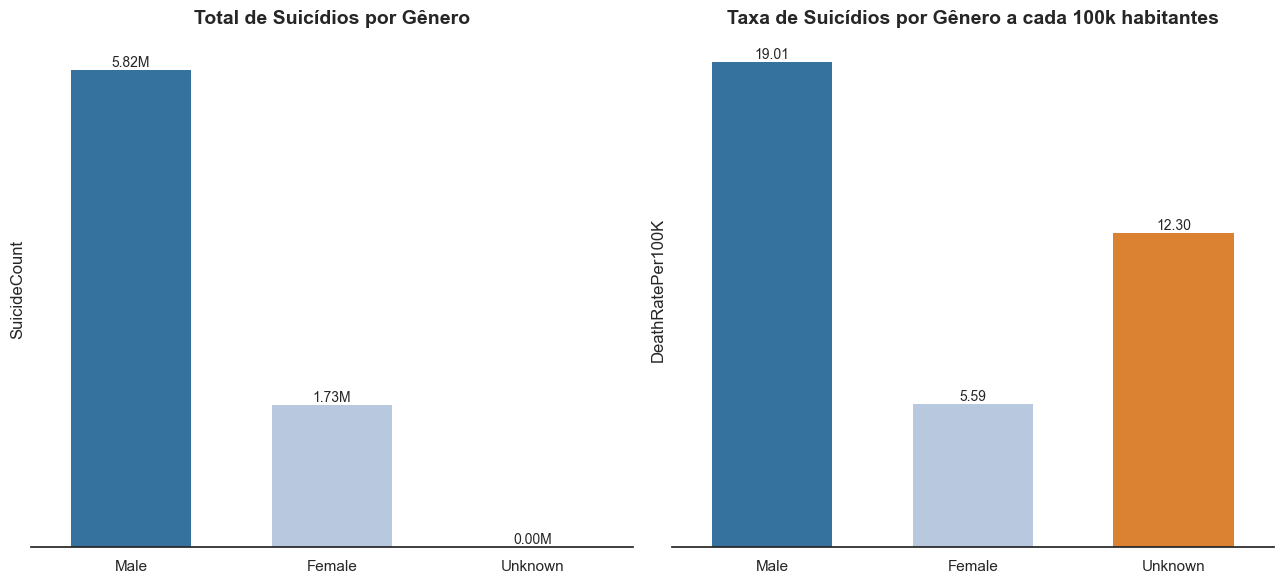

In [120]:
# Definir estilo Seaborn para um design limpo e interface visual elegante
sns.set_style("white")

# Criar uma figura e subplots com tamanhos apropriados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

# Definir a largura das barras
bar_width = 0.6

# Gráfico 1: Contagem total de suicídios por gênero
sns.barplot(
    x="Sex",
    y="SuicideCount",
    data=dados_ajustados,
    ax=axes[0],
    palette="tab20",  # Definir a paleta de cores
    estimator=lambda x: x.sum(),  # Calcular total para barras empilhadas
    errwidth=0,  # Remover barras de erro
    linewidth=0,
    saturation=0.7,
    capsize=0.1,
    width=bar_width
)

# Adicionar rótulos de dados em milhões
for p in axes[0].patches:
    label = '{:.2f}M'.format(p.get_height() / 1e6)
    axes[0].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Personalizar título e layout
axes[0].set_title("Total de Suicídios por Gênero", fontsize=14, fontweight="bold")
axes[0].set_xlabel("", fontsize=12)

# Remover o eixo Y e as bordas
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].set_yticks([])  # Remover rótulos do eixo Y

# Gráfico 2: Taxa de suicídio por 100k habitantes por gênero
sns.barplot(
    x="Sex",
    y="DeathRatePer100K",
    data=dados_ajustados,
    ax=axes[1],
    palette="tab20",  # Definir a paleta de cores
    estimator=lambda x: x.mean(),  # Calcular a média para barras empilhadas
    errwidth=0,  # Remover barras de erro
    linewidth=0,
    saturation=0.7,
    capsize=0.1,
    width=bar_width
)

# Adicionar rótulos de dados em valores numéricos
for p in axes[1].patches:
    label = '{:.2f}'.format(p.get_height())
    axes[1].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Personalizar título e layout
axes[1].set_title("Taxa de Suicídios por Gênero a cada 100k habitantes", fontsize=14, fontweight="bold")
axes[1].set_xlabel("", fontsize=12)

# Remover o eixo Y e as bordas
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_yticks([])  # Remover rótulos do eixo Y

#plt.subplots_adjust(wspace=0.9)
# Ajustar layout para melhor apresentação
plt.tight_layout()

# Exibir o gráfico
plt.show()



In [121]:
# Agrupar os dados por gênero e somar o número total de suicídios
suicides_by_gender_br = df_brasil.groupby('Sex')['SuicideCount'].sum().reset_index()

# Calcular o total geral de suicídios
total_suicides_br = suicides_by_gender_br['SuicideCount'].sum()

# Calcular a percentagem de suicídios por gênero
suicides_by_gender_br['Percentage'] = (suicides_by_gender_br['SuicideCount'] / total_suicides_br * 100).round(2)

# Exibir o total e a percentagem de suicídios por gênero
print(suicides_by_gender_br)

       Sex  SuicideCount  Percentage
0   Female       57206.0       21.23
1     Male      212141.0       78.75
2  Unknown          50.0        0.02


In [122]:
# Verificar os valores únicos na coluna 'AgeGroup'
age_group_unique_values = dados_ajustados['AgeGroup'].unique()
print(age_group_unique_values)


['0-14 years' '15-24 years' '25-34 years' '35-54 years' '55-74 years'
 '75+ years' 'Unknown']


### Média global de Sucidios por grupo etário

In [123]:
# Criar uma tabela dinâmica com o número de suicídios por grupo etário e ano
table = pd.pivot_table(dados_ajustados, values='SuicideCount', index=['Year'], columns=['AgeGroup'])

# Reordenar as colunas para que os grupos etários fiquem em ordem crescente
column_order = ['0-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years', 'Unknown']
table = table.reindex(column_order, axis=1)

# Arredondar os valores para uma casa decimal
table = table.round(1)

# Calcular a média geral por grupo etário ao longo de todos os anos
mean_by_age_group = table.mean().round(1)

# Exibir a média por grupo etário
print(mean_by_age_group)


AgeGroup
0-14 years       2.8
15-24 years     75.0
25-34 years    103.9
35-54 years    113.4
55-74 years     78.3
75+ years       42.0
Unknown          2.8
dtype: float64


### Média no Brasil

In [124]:
# estatística de suicídios por faixa etária
# Criar uma tabela dinâmica com o número de suicídios por grupo etário e ano
table = pd.pivot_table(df_brasil, values='SuicideCount', index=['Year'], columns=['AgeGroup'])

# Reordenar as colunas para que os grupos etários fiquem em ordem crescente
column_order = ['0-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years', 'Unknown']
table = table.reindex(column_order, axis=1)

# Arredondar os valores para uma casa decimal
table = table.round(1)

# Calcular o total de suicídios por faixa etária (somando ao longo dos anos)
total_by_age_group = table.sum()

# Calcular o total geral de suicídios (soma de todas as faixas etárias)
total_general = total_by_age_group.sum()

# Calcular a percentagem de suicídios para cada faixa etária
percentage_by_age_group = (total_by_age_group / total_general * 100).round(2)

# Exibir a percentagem por faixa etária
print(percentage_by_age_group)


AgeGroup
0-14 years      0.92
15-24 years    26.44
25-34 years    31.13
35-54 years    24.76
55-74 years    11.95
75+ years       3.79
Unknown         1.00
dtype: float64
